# Timing Functions

This notebook has the results of timing various CSR functions.  It uses the data produced by the benchmark suite and saved in `bench.json`; to prepare that data, run:

    python -m pytest --benchmark-only

In [1]:
import json
import numpy as np
import scipy.sparse as sps
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Let's load the benchmark data:

In [2]:
with open('bench.json', 'r') as jsf:
    data = json.load(jsf)
list(data.keys())

['machine_info', 'commit_info', 'benchmarks', 'datetime', 'version']

And define a function to get the various benchmark runs:

In [3]:
def get_runs(group, *params):
    marks = [b for b in data['benchmarks'] if b['group'] == group]
    ps = ['kernel'] + list(params)
    runs = {}
    for b in data['benchmarks']:
        if b['group'] != group:
            continue
        
        key = tuple(b['params'][p] for p in ps)
        runs[key] = pd.Series(b['stats']['data'], name='time')
    
    runs = pd.concat(runs, names=ps)
    runs = runs.reset_index(ps)
    runs = runs.reset_index(drop=True)
    return runs

In [4]:
get_runs('MultAB')

,kernel,time
0,scipy,0.000814
1,scipy,0.000813
2,scipy,0.000818
3,scipy,0.000811
4,scipy,0.000811
...,...,...
38367,mkl,0.000210
38368,mkl,0.000211
38369,mkl,0.000209
38370,mkl,0.000212


## Matrix Multiplication

Our first benchmark is a simple matrix multiplication.

In [5]:
mab = get_runs('MultAB')
mab['time'] *= 1000
mab.groupby('kernel')['time'].describe()

,count,mean,std,min,25%,50%,75%,max
kernel,,,,,,,,
mkl,25563.0,0.221238,0.048534,0.1634,0.197800,0.2099,0.227500,2.6956
numba,6687.0,0.791025,0.119318,0.7266,0.745950,0.7482,0.758300,2.0537
scipy,6122.0,0.840477,0.119319,0.7692,0.789425,0.7956,0.819475,1.8663


[]

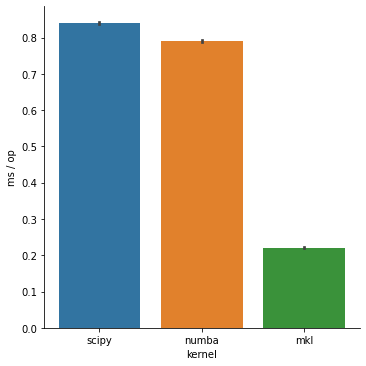

In [6]:
sns.catplot(data=mab, x='kernel', y='time', kind='bar')
plt.ylabel('ms / op')
plt.plot()

And multiplying by the transpose:

In [7]:
mab = get_runs('MultABt')
mab['time'] *= 1000
mab.groupby('kernel')['time'].describe()

,count,mean,std,min,25%,50%,75%,max
kernel,,,,,,,,
mkl,14741.0,0.298596,0.032470,0.2276,0.27820,0.2941,0.311700,1.2206
numba,5850.0,0.871992,0.118618,0.8170,0.82370,0.8262,0.849375,2.6677
scipy,5203.0,1.050522,0.197252,0.9157,0.94435,0.9592,1.072800,2.2820


[]

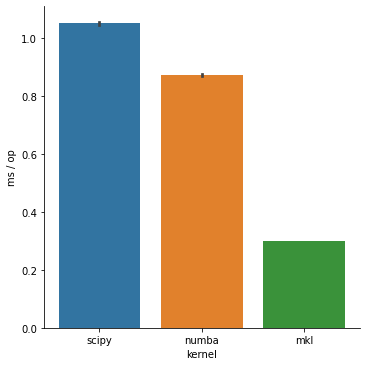

In [8]:
sns.catplot(data=mab, x='kernel', y='time', kind='bar')
plt.ylabel('ms / op')
plt.plot()

### Sweep by Density

We now measure sweeping a 100x100 square matrix multiply by increasing density.

In [9]:
dens = get_runs('MultAB-Density', 'density')
dens['time'] *= 1000

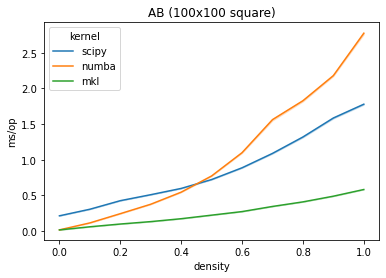

In [10]:
sns.lineplot(data=dens, x='density', y='time', hue='kernel')
plt.title('AB (100x100 square)')
plt.ylabel('ms/op')
plt.show()

And the transpose:

In [11]:
dens = get_runs('MultABt-Density', 'density')
dens['time'] *= 1000

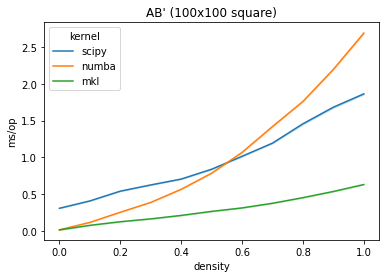

In [12]:
sns.lineplot(data=dens, x='density', y='time', hue='kernel')
plt.title('AB\' (100x100 square)')
plt.ylabel('ms/op')
plt.show()

## Matrix-Vector Multiplication

Now we'll look at matrix/vector multiplication ($A\vec{x}$)

In [13]:
muax = get_runs('MultAx')
muax['time'] *= 1000
muax.groupby('kernel')['time'].describe()

,count,mean,std,min,25%,50%,75%,max
kernel,,,,,,,,
mkl,111857.0,0.012400,0.005569,0.0087,0.0098,0.0106,0.0132,0.2014
numba,171822.0,0.009630,0.004018,0.0085,0.0088,0.0089,0.0090,0.2385
scipy,34675.0,0.051585,0.128492,0.0446,0.0458,0.0467,0.0475,23.7637


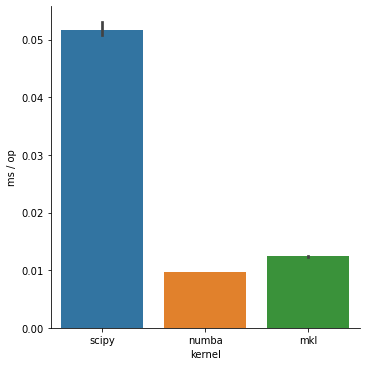

In [14]:
sns.catplot(data=muax, x='kernel', y='time', kind='bar')
plt.ylabel('ms / op')
plt.show()